# F1 Strategy Engine - Visualization APIs Demo

This notebook demonstrates all visualization API endpoints with interactive examples.

## 📊 Available Visualizations:
1. Speed Trace Comparison
2. Throttle & Brake Analysis
3. Lap Time Distribution
4. Sector Comparison
5. Tyre Degradation
6. Gear Usage
7. Performance Radar
8. Multi-Track Analysis

**Requirements:**
- Server running on `http://localhost:8001`
- FastF1 data available for selected events

In [15]:
# Import required libraries
import requests
import plotly.graph_objects as go
from IPython.display import Image, display, HTML
import time

BASE_URL = "http://localhost:8001"

In [16]:
# Helper function to fetch and display charts
def get_chart(endpoint, params, show_json=True, show_png=False):
    """
    Fetch and display visualization from API
    
    Args:
        endpoint: API endpoint path
        params: Query parameters
        show_json: Display interactive Plotly chart
        show_png: Display PNG image
    """
    try:
        # Get JSON format (interactive)
        if show_json:
            params['format'] = 'json'
            start_time = time.time()
            response = requests.get(f"{BASE_URL}{endpoint}", params=params, timeout=120)
            elapsed = time.time() - start_time
            
            if response.status_code == 200:
                data = response.json()
                print(f"✅ Response time: {elapsed:.3f}s")
                fig = go.Figure(data=data.get('data', []), layout=data.get('layout', {}))
                fig.show()
            else:
                print(f"❌ Error {response.status_code}: {response.text}")
        
        # Get PNG format (static)
        if show_png:
            params['format'] = 'png'
            start_time = time.time()
            response = requests.get(f"{BASE_URL}{endpoint}", params=params, timeout=120)
            elapsed = time.time() - start_time
            
            if response.status_code == 200:
                print(f"✅ PNG Response time: {elapsed:.3f}s")
                display(Image(response.content))
            else:
                print(f"❌ PNG Error {response.status_code}: {response.text}")
                
    except requests.exceptions.ConnectionError:
        print("❌ Could not connect to server. Make sure it's running on port 8001")
    except Exception as e:
        print(f"❌ Error: {e}")

## 1. 🏎️ Speed Trace Comparison

Compare speed profiles of two drivers throughout a lap.

In [17]:
get_chart(
    endpoint="/api/v1/visualizations/speed-trace",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'Q',
        'driver1': 'VER',
        'driver2': 'LEC'
    },
    show_json=True,
    show_png=False
)

❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}


## 2. 🎯 Throttle & Brake Analysis

Analyze throttle and brake application patterns.

In [18]:
get_chart(
    endpoint="/api/v1/visualizations/throttle-brake",
    params={
        'year': 2023,
        'event': 'Silverstone',
        'session': 'Q',
        'driver1': 'HAM',
        'driver2': 'RUS'
    },
    show_json=True
)

❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/throttle-brake"}}


## 3. 📊 Lap Time Distribution

Compare consistency across multiple drivers using box plots.

✅ Response time: 3.981s


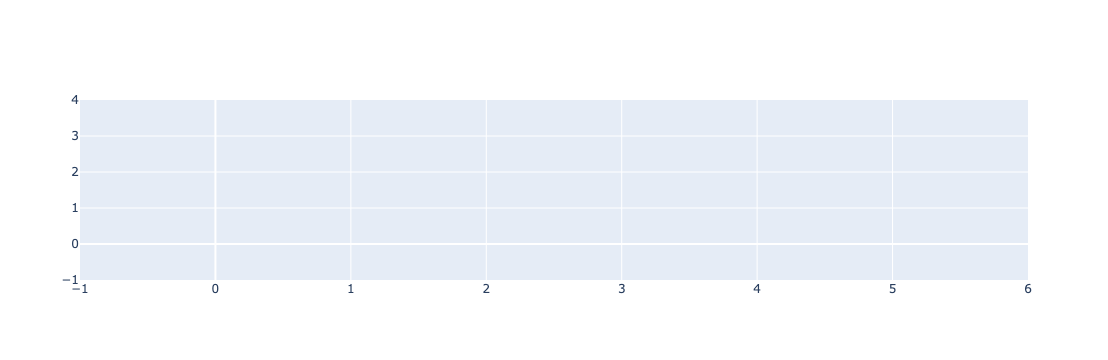

In [19]:
get_chart(
    endpoint="/api/v1/visualizations/lap-time-distribution",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'Q',
        'drivers': 'VER,LEC,HAM,ALO,SAI'
    },
    show_json=True
)

## 4. 📈 Sector Comparison

Compare sector times to identify strengths and weaknesses.

In [20]:
get_chart(
    endpoint="/api/v1/visualizations/sector-comparison",
    params={
        'year': 2023,
        'event': 'Monza',
        'session': 'Q',
        'driver1': 'VER',
        'driver2': 'LEC'
    },
    show_json=True
)

❌ Error 500: {"error":{"message":"'str' object has no attribute 'total_seconds'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/sector-comparison"}}


## 5. 🛞 Tyre Degradation

Visualize how lap times degrade with tyre age.

In [21]:
get_chart(
    endpoint="/api/v1/visualizations/tyre-degradation",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'R',
        'driver': 'VER'
    },
    show_json=True
)

❌ Error 500: {"error":{"message":"'str' object has no attribute 'total_seconds'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/tyre-degradation"}}


## 6. ⚙️ Gear Usage

Show which gear is used at each point on the track.

In [22]:
get_chart(
    endpoint="/api/v1/visualizations/gear-usage",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'Q',
        'driver': 'LEC'
    },
    show_json=True
)

❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/gear-usage"}}


## 7. 🎯 Performance Radar

Multi-dimensional performance comparison radar chart.

In [23]:
get_chart(
    endpoint="/api/v1/visualizations/performance-radar",
    params={
        'year': 2023,
        'event': 'Spa',
        'session': 'Q',
        'driver1': 'VER',
        'driver2': 'HAM'
    },
    show_json=True
)

❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/performance-radar"}}


## 8. 🏆 Multi-Track Analysis

Compare VER vs LEC across multiple circuits.

In [24]:
tracks = ['Monaco', 'Monza', 'Silverstone', 'Spa']

for track in tracks:
    print(f"\n{'='*70}")
    print(f"🏁 {track} - Speed Trace Analysis")
    print(f"{'='*70}")
    
    get_chart(
        endpoint="/api/v1/visualizations/speed-trace",
        params={
            'year': 2023,
            'event': track,
            'session': 'Q',
            'driver1': 'VER',
            'driver2': 'LEC'
        },
        show_json=True
    )


🏁 Monaco - Speed Trace Analysis
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

🏁 Monza - Speed Trace Analysis
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

🏁 Silverstone - Speed Trace Analysis
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

🏁 Spa - Speed Trace Analysis
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}


## 📸 PNG Export Example

Get static PNG images for reports/presentations.

In [25]:
# Show both JSON (interactive) and PNG (static) side-by-side
print("Interactive Plotly Chart:")
get_chart(
    endpoint="/api/v1/visualizations/speed-trace",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'Q',
        'driver1': 'VER',
        'driver2': 'LEC'
    },
    show_json=True,
    show_png=False
)

print("\nStatic PNG Image:")
get_chart(
    endpoint="/api/v1/visualizations/speed-trace",
    params={
        'year': 2023,
        'event': 'Monaco',
        'session': 'Q',
        'driver1': 'VER',
        'driver2': 'LEC'
    },
    show_json=False,
    show_png=True
)

Interactive Plotly Chart:
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

Static PNG Image:
❌ PNG Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}


## 💾 Save Charts to Files

Download PNG charts and save them locally.

In [26]:
import os

# Create output directory
output_dir = 'charts_output'
os.makedirs(output_dir, exist_ok=True)

# Define charts to download
charts = [
    ('speed_trace', '/api/v1/visualizations/speed-trace', 
     {'year': 2023, 'event': 'Monaco', 'session': 'Q', 'driver1': 'VER', 'driver2': 'LEC', 'format': 'png'}),
    
    ('throttle_brake', '/api/v1/visualizations/throttle-brake',
     {'year': 2023, 'event': 'Silverstone', 'session': 'Q', 'driver1': 'HAM', 'driver2': 'RUS', 'format': 'png'}),
    
    ('sector_comparison', '/api/v1/visualizations/sector-comparison',
     {'year': 2023, 'event': 'Monza', 'session': 'Q', 'driver1': 'VER', 'driver2': 'LEC', 'format': 'png'}),
    
    ('tyre_degradation', '/api/v1/visualizations/tyre-degradation',
     {'year': 2023, 'event': 'Monaco', 'session': 'R', 'driver': 'VER', 'format': 'png'}),
    
    ('performance_radar', '/api/v1/visualizations/performance-radar',
     {'year': 2023, 'event': 'Spa', 'session': 'Q', 'driver1': 'VER', 'driver2': 'HAM', 'format': 'png'}),

    ('lap_time_distribution', '/api/v1/visualizations/lap-time-distribution',
     {'year': 2023, 'event': 'Monaco', 'session': 'Q', 'drivers': 'VER,LEC,HAM,ALO,SAI', 'format': 'png'}),

    ('gear_usage', '/api/v1/visualizations/gear-usage',
     {'year': 2023, 'event': 'Monaco', 'session': 'Q', 'driver': 'LEC', 'format': 'png'}),
]

# Download each chart
for name, endpoint, params in charts:
    try:
        response = requests.get(f"{BASE_URL}{endpoint}", params=params, timeout=120)
        if response.status_code == 200:
            filepath = os.path.join(output_dir, f'{name}.png')
            with open(filepath, 'wb') as f:
                f.write(response.content)
            print(f"✅ Saved: {filepath}")
        else:
            print(f"❌ Failed to download {name}: {response.status_code}")
    except Exception as e:
        print(f"❌ Error downloading {name}: {e}")

print(f"\n📁 All charts saved to: {os.path.abspath(output_dir)}")

❌ Failed to download speed_trace: 500
❌ Failed to download throttle_brake: 500
❌ Failed to download sector_comparison: 500
❌ Failed to download tyre_degradation: 500
❌ Failed to download performance_radar: 500
❌ Failed to download lap_time_distribution: 500
❌ Failed to download gear_usage: 500

📁 All charts saved to: /Users/pa419@apac.comcast.com/Github/f1-strat-engine/f1-race-strategy-simulator/demo/apis/visualization/charts_output


## 🔧 Customization Examples

### Different Years and Events

In [27]:
# Compare different years at the same track
years = [2022, 2023]

for year in years:
    print(f"\n🗓️ {year} Monaco Grand Prix")
    get_chart(
        endpoint="/api/v1/visualizations/speed-trace",
        params={
            'year': year,
            'event': 'Monaco',
            'session': 'Q',
            'driver1': 'VER',
            'driver2': 'LEC'
        },
        show_json=True
    )


🗓️ 2022 Monaco Grand Prix
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

🗓️ 2023 Monaco Grand Prix
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}


### Different Sessions

In [28]:
# Compare Qualifying vs Race
sessions = [('Q', 'Qualifying'), ('R', 'Race')]

for session_code, session_name in sessions:
    print(f"\n📊 {session_name} Session")
    get_chart(
        endpoint="/api/v1/visualizations/speed-trace",
        params={
            'year': 2023,
            'event': 'Monza',
            'session': session_code,
            'driver1': 'VER',
            'driver2': 'LEC'
        },
        show_json=True
    )


📊 Qualifying Session
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}

📊 Race Session
❌ Error 500: {"error":{"message":"'Series' object has no attribute 'get_telemetry'","type":"HTTPException","details":{},"path":"/api/v1/visualizations/speed-trace"}}


## 📊 Summary

This notebook demonstrated:
- ✅ All 7 visualization endpoints
- ✅ Interactive Plotly charts (JSON format)
- ✅ Static PNG images
- ✅ Batch processing multiple tracks
- ✅ Saving charts to files
- ✅ Customization examples

### Next Steps:
1. Modify parameters (year, event, drivers) to explore different scenarios
2. Combine multiple visualizations for comprehensive analysis
3. Export charts for reports or presentations
4. Use the data for strategy planning

### API Documentation:
Visit `http://localhost:8000/docs` for interactive API documentation.